In [ ]:
import geopandas as gpd
import shapely
import streamlit as st
from shapely.geometry import Point, Polygon, MultiPolygon
import matplotlib.pyplot as plt


def extract_coords(geom):
    coords = []
    if isinstance(geom, Polygon):
        coords = list(geom.exterior.coords)
    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:  # Iterate through each polygon in the MultiPolygon
            coords.extend(list(poly.exterior.coords))
    return coords

# Apply to the USA geometry
coords = extract_coords(usa.geometry.values[0])

# Create DataFrame
df_coords = pd.DataFrame(coords, columns=["longitude", "latitude"])

df_coords


,longitude,latitude
0,-122.840000,49.000000
1,-120.000000,49.000000
2,-117.031210,49.000000
3,-116.048180,49.000000
4,-113.000000,49.000000
...,...,...
442,-170.290556,63.194438
443,-170.671386,63.375822
444,-171.553063,63.317789
445,-171.791111,63.405846


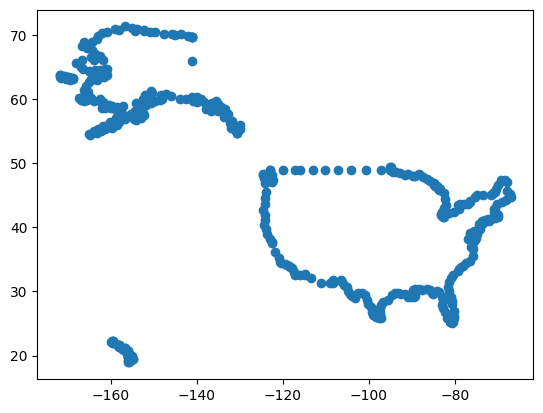

In [24]:
# Load the shapefile
usa = gpd.read_file("/workspaces/4geeks_final_project/data/raw/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Filter for the USA
usa = usa[usa['NAME'] == 'United States of America']

# Function to extract coordinates from a Polygon or MultiPolygon
def extract_coords(geom):
    coords = []
    if isinstance(geom, Polygon):
        coords = list(geom.exterior.coords)
    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:  # Iterate through each polygon in the MultiPolygon
            coords.extend(list(poly.exterior.coords))
    return coords

longi = []
lati = []

for long, lat in coords:
    longi.append(long)
    lati.append(lat)


plt.scatter(longi,lati)
plt.show()

In [20]:
import pandas as pd
import pickle as pkl

df = pd.read_csv('/workspaces/4geeks_final_project/data/processed/df.csv')

#-------------- # Average lenghth by month and state

df_subset = df[['date', 'length', 'state', 'month']]
df_subset = df_subset[df_subset['date'] > "2014-12-31"].reset_index()
state_month_length_avg = df_subset.groupby(['state', 'month'])['length'].mean().reset_index()


#-------------- # Average width by month and state

df_subset = df[['date', 'width', 'state', 'month']]
df_subset = df_subset[df_subset['date'] > "2014-12-31"].reset_index()
state_month_width_avg = df_subset.groupby(['state', 'month'])['width'].mean().reset_index()

state_month_width_avg.to_csv("state_month_width_avg_2019_to_2021.csv", index=False)
state_month_length_avg.to_csv("state_month_length_avg_2019_to_2021.csv", index=False)


In [ ]:


##----------FIRST I COUNTED HOW MANY MONTHS EACH STATE HAD
'''import pandas as pd
# Load your DataFrame
av_l = pd.read_csv('/workspaces/4geeks_final_project/data/processed/state_month_length_avg_2019_to_2021.csv')

# List of states you want to count
states_list = ['AL', 'AR', 'AZ', 'CA', 'CO', 'FL', 'GA', 'IA', 'IL', 'IN', 'KS', 'KY', 'LA', 'MD',
               'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NM', 'NY', 'OH', 'OK', 'PA', 'SC',
               'SD', 'TN', 'TX', 'VA', 'WI', 'WY']

# Filter the DataFrame for those states and count rows for each
state_counts = av_l[av_l['state'].isin(states_list)]['state'].value_counts()

# Display the counts
print(state_counts)
'''



#--------- THEN I CHECKED TO SEE WHICH STATES WERE MISSING WHICH MONTHS

'''
import pandas as pd

# Load your DataFrame
av_l = pd.read_csv('/workspaces/4geeks_final_project/data/processed/state_month_length_avg_2015_to_2021.csv')

# List of all months (assuming month is an integer from 1 to 12)
all_months = set(range(1, 13))

# Group the DataFrame by state and check which months are missing
for state, group in av_l.groupby('state'):
    months_present = set(group['month'].unique())
    missing_months = sorted(all_months - months_present)
    
    if missing_months:
        print(f"{state} is missing months: {missing_months}")
'''

'''
print(
IA is missing 1 month(s): [1]  
IN is missing 1 month(s): [1]  
KS is missing 1 month(s): [1]  
MI is missing 1 month(s): [1]  
NC is missing 1 month(s): [1]  
AL is missing 1 month(s): [9]  
OK is missing 2 month(s): [2, 9]  
NM is missing 2 month(s): [1, 11]  
PA is missing 2 month(s): [3, 12]  
NE is missing 3 month(s): [1, 2, 3]  
CO is missing 4 month(s): [1, 2, 11, 12]  
MD is missing 4 month(s): [1, 3, 10, 12]  
NY is missing 4 month(s): [1, 2, 3, 12]  
MN is missing 4 month(s): [1, 2, 4, 11]  
AZ is missing 5 month(s): [1, 2, 3, 4, 12]  
WI is missing 3 month(s): [1, 2, 11]  
ND is missing 6 month(s): [1, 2, 3, 4, 11, 12]  
SD is missing 6 month(s): [1, 2, 3, 4, 11, 12]  
WY is missing 6 month(s): [1, 2, 3, 10, 11, 12]  
MT is missing 8 month(s): [1, 2, 3, 4, 9, 10, 11, 12])
''' 

#----------- HERE I MADE IT SO IF THE STATES HAD UNCONSECUTIVE MONTHS OF NO DATA, TO AVERAGE THE PREVIOUS AND FOLLOWING MONTH, BUT IF THEY HAD MORE THAN 4 MISSING MONTHS 
# (THEY WERE MOSTLY CONSECUTIVE SO I MADE THEM AND ARE GENERALLY STATES WITH LOWER TORNADO COUNTS, THEY ALSO TENDED TO BE MOUNTAINOUS AREAS, 
# AND DURING LESS HUMID TIMES OF THE YEAR, WINTER AND AUTUMN)

import pandas as pd

# Load dataset
av_l = pd.read_csv('/workspaces/4geeks_final_project/data/processed/state_month_length_avg_2015_to_2021.csv')

# Group A: interpolate missing months
interpolate_states = {
    'IA': [1], 'IN': [1], 'KS': [1], 'MI': [1], 'NC': [1],
    'AL': [9], 'OK': [2, 9], 'NM': [1, 11], 'PA': [3, 12]
}

for state, missing_months in interpolate_states.items():
    for month in missing_months:
        prev_month = month - 1
        next_month = month + 1

        prev_rows = av_l[(av_l['state'] == state) & (av_l['month'] == prev_month)]
        next_rows = av_l[(av_l['state'] == state) & (av_l['month'] == next_month)]

        if not prev_rows.empty and not next_rows.empty:
            interpolated = (prev_rows.iloc[0]['length'] + next_rows.iloc[0]['length']) / 2
        elif not prev_rows.empty:
            interpolated = prev_rows.iloc[0]['length']
        elif not next_rows.empty:
            interpolated = next_rows.iloc[0]['length']
        else:
            # If no neighboring months exist, default to 0
            interpolated = 0

        av_l = pd.concat([av_l, pd.DataFrame([{
            'state': state, 'month': month, 'length': interpolated
        }])], ignore_index=True)

# Group B: add missing months with 0 length
zero_fill_states = {
    'NE': [1, 2, 3],
    'CO': [1, 2, 11, 12],
    'MD': [1, 3, 10, 12],
    'NY': [1, 2, 3, 12],
    'MN': [1, 2, 4, 11],
    'AZ': [1, 2, 3, 4, 12],
    'WI': [1, 2, 11],
    'ND': [1, 2, 3, 4, 11, 12],
    'SD': [1, 2, 3, 4, 11, 12],
    'WY': [1, 2, 3, 10, 11, 12],
    'MT': [1, 2, 3, 4, 9, 10, 11, 12]
}

for state, months in zero_fill_states.items():
    for month in months:
        exists = av_l[(av_l['state'] == state) & (av_l['month'] == month)]
        if exists.empty:
            av_l = pd.concat([av_l, pd.DataFrame([{
                'state': state, 'month': month, 'length': 0
            }])], ignore_index=True)

# Sort
av_l = av_l.sort_values(by=['state', 'month']).reset_index(drop=True)

# Optional: Save to CSV
# av_l.to_csv('state_month_fixed.csv', index=False)



# List of all months (assuming month is an integer from 1 to 12)
all_months = set(range(1, 13))

# Group the DataFrame by state and check which months are missing
for state, group in av_l.groupby('state'):
    months_present = set(group['month'].unique())
    missing_months = sorted(all_months - months_present)
    
    if missing_months:
        print(f"{state} is missing months: {missing_months}")

#--------
# 
# UPDATE CSV FILE 

file_path = '/workspaces/4geeks_final_project/data/processed/state_month_length_avg_2015_to_2021.csv'

# Save the updated DataFrame to the CSV file
av_l.to_csv(file_path, index=False)






In [35]:




##----------FIRST I COUNTED HOW MANY MONTHS EACH STATE HAD
'''
import pandas as pd

# Load your DataFrame
av_w = pd.read_csv('/workspaces/4geeks_final_project/data/processed/state_month_width_avg_2015_to_2021.csv')

# List of states you want to count
states_list = ['AL', 'AR', 'AZ', 'CA', 'CO', 'FL', 'GA', 'IA', 'IL', 'IN', 'KS', 'KY', 'LA', 'MD',
               'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NM', 'NY', 'OH', 'OK', 'PA', 'SC',
               'SD', 'TN', 'TX', 'VA', 'WI', 'WY']

# Filter the DataFrame for those states and count rows for each
state_counts = av_w[av_w['state'].isin(states_list)]['state'].value_counts()

# Display the counts
print(state_counts)

'''


#--------- THEN I CHECKED TO SEE WHICH STATES WERE MISSING WHICH MONTHS
'''
import pandas as pd

# Load your DataFrame
av_w = pd.read_csv('/workspaces/4geeks_final_project/data/processed/state_month_width_avg_2015_to_2021.csv')

# List of all months (assuming month is an integer from 1 to 12)
all_months = set(range(1, 13))

# Store the states and missing months
missing_data = []

# Group the DataFrame by state and check which months are missing
for state, group in av_w.groupby('state'):
    months_present = set(group['month'].unique())
    missing_months = sorted(all_months - months_present)
    
    if missing_months:
        missing_data.append((state, missing_months))

# Sort the missing data by the length of missing months (least to most)
missing_data_sorted = sorted(missing_data, key=lambda x: len(x[1]))

# Display the sorted output
for state, missing_months in missing_data_sorted:
    print(f"{state} is missing months: {missing_months}")
'''
''' 
AL is missing months: [9]
IA is missing months: [1]
IN is missing months: [1]
KS is missing months: [1]
MI is missing months: [1]
NC is missing months: [1]
NM is missing months: [1, 11]
OK is missing months: [2, 9]
PA is missing months: [3, 12]
NE is missing months: [1, 2, 3]
WI is missing months: [1, 2, 11]
CO is missing months: [1, 2, 11, 12]
MD is missing months: [1, 3, 10, 12]
MN is missing months: [1, 2, 4, 11]
NY is missing months: [1, 2, 3, 12]
AZ is missing months: [1, 2, 3, 4, 12]
ND is missing months: [1, 2, 3, 4, 11, 12]
SD is missing months: [1, 2, 3, 4, 11, 12]
WY is missing months: [1, 2, 3, 10, 11, 12]
MT is missing months: [1, 2, 3, 4, 9, 10, 11, 12]
''' 

#----------- HERE I MADE IT SO IF THE STATES HAD UNCONSECUTIVE MONTHS OF NO DATA, TO AVERAGE THE PREVIOUS AND FOLLOWING MONTH, BUT IF THEY HAD MORE THAN 4 MISSING MONTHS 
# (THEY WERE MOSTLY CONSECUTIVE SO I MADE THEM AND ARE GENERALLY STATES WITH LOWER TORNADO COUNTS, THEY ALSO TENDED TO BE MOUNTAINOUS AREAS, 
# AND DURING LESS HUMID TIMES OF THE YEAR, WINTER AND AUTUMN)
#SAME 0'S AS ABOVE SO THE DATA SETS MATCH


import pandas as pd

# Load dataset
av_w = pd.read_csv('/workspaces/4geeks_final_project/data/processed/state_month_width_avg_2015_to_2021.csv')

# Group A: interpolate missing months
interpolate_states = {
    'IA': [1], 'IN': [1], 'KS': [1], 'MI': [1], 'NC': [1],
    'AL': [9], 'OK': [2, 9], 'NM': [1, 11], 'PA': [3, 12]
}

# Interpolation: For states with missing months, calculate the average of adjacent months
for state, missing_months in interpolate_states.items():
    for month in missing_months:
        prev_month = month - 1
        next_month = month + 1

        # Find rows for the previous and next months
        prev_rows = av_w[(av_w['state'] == state) & (av_w['month'] == prev_month)]
        next_rows = av_w[(av_w['state'] == state) & (av_w['month'] == next_month)]

        if not prev_rows.empty and not next_rows.empty:
            # If both adjacent months exist, use their average for interpolation
            interpolated = (prev_rows.iloc[0]['width'] + next_rows.iloc[0]['width']) / 2
        elif not prev_rows.empty:
            # If only the previous month exists, use its value
            interpolated = prev_rows.iloc[0]['width']
        elif not next_rows.empty:
            # If only the next month exists, use its value
            interpolated = next_rows.iloc[0]['width']
        else:
            # If no neighboring months exist, default to 0
            interpolated = 0

        # Add interpolated value to the DataFrame
        av_w = pd.concat([av_w, pd.DataFrame([{
            'state': state, 'month': month, 'width': interpolated
        }])], ignore_index=True)

# Group B: add missing months with 0 width
zero_fill_states = {
    'NE': [1, 2, 3],
    'CO': [1, 2, 11, 12],
    'MD': [1, 3, 10, 12],
    'NY': [1, 2, 3, 12],
    'MN': [1, 2, 4, 11],
    'AZ': [1, 2, 3, 4, 12],
    'WI': [1, 2, 11],
    'ND': [1, 2, 3, 4, 11, 12],
    'SD': [1, 2, 3, 4, 11, 12],
    'WY': [1, 2, 3, 10, 11, 12],
    'MT': [1, 2, 3, 4, 9, 10, 11, 12]
}

# Add rows for missing months and set the width to 0
for state, months in zero_fill_states.items():
    for month in months:
        exists = av_w[(av_w['state'] == state) & (av_w['month'] == month)]
        if exists.empty:
            av_w = pd.concat([av_w, pd.DataFrame([{
                'state': state, 'month': month, 'width': 0
            }])], ignore_index=True)

# Sort DataFrame by state and month
av_w = av_w.sort_values(by=['state', 'month']).reset_index(drop=True)

# List of all months (assuming month is an integer from 1 to 12)
all_months = set(range(1, 13))

# Check which months are missing for each state
for state, group in av_w.groupby('state'):
    months_present = set(group['month'].unique())
    missing_months = sorted(all_months - months_present)
    
    if missing_months:
        print(f"{state} is missing months: {missing_months}")

# Save the updated DataFrame to the CSV file
file_path = '/workspaces/4geeks_final_project/data/processed/state_month_width_avg_2015_to_2021.csv'
av_w.to_csv(file_path, index=False)



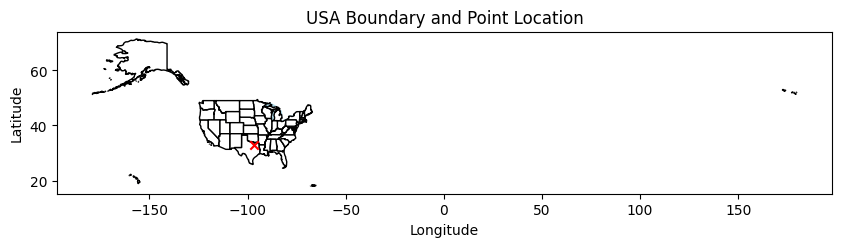

In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Define the coordinates (Longitude, Latitude) manually
longitude = -96.80  # Example Longitude
latitude = 32.78   # Example Latitude

# Load the shapefile for USA boundary
usa = gpd.read_file("/workspaces/4geeks_final_project/data/raw/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
usa = usa[usa['NAME'] == 'United States of America']
usa = usa.to_crs(epsg=4326)

# Load the shapefile for US states
states = gpd.read_file("/workspaces/4geeks_final_project/data/raw/cb_2022_us_state_20m/cb_2022_us_state_20m.shp")
states = states.to_crs(epsg=4326)

# Plot USA boundary and point
fig, ax = plt.subplots(figsize=(10, 10))
usa.plot(ax=ax, color='lightblue')
states.plot(ax=ax, color='white', edgecolor='black')
ax.scatter(longitude, latitude, color='red', marker='x')  # Plot the point

plt.title("USA Boundary and Point Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Checking point: POINT (-96.8 32.78)
The point is within the boundaries of the USA and on land!


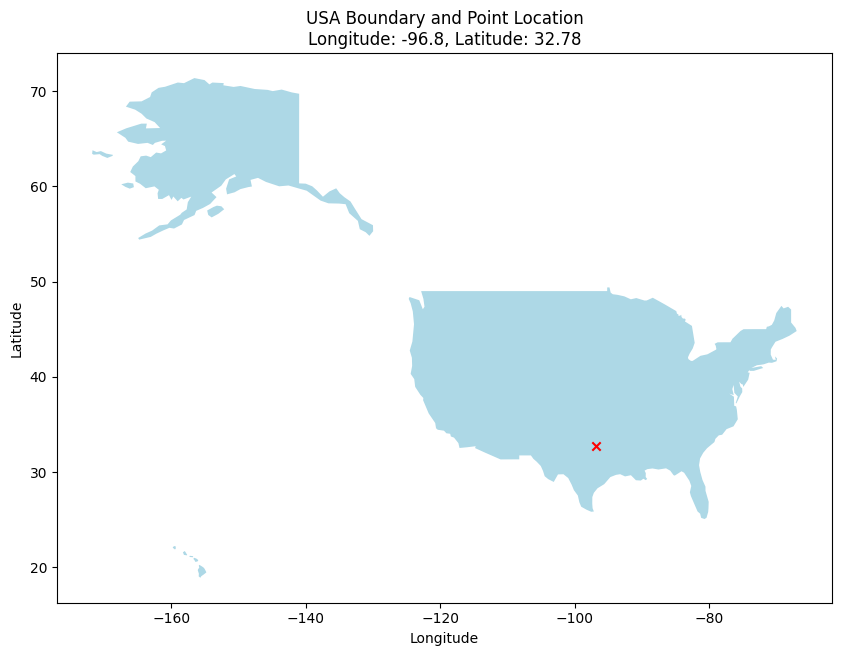

In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon

# Load the shapefile (USA boundary)
usa = gpd.read_file("/workspaces/4geeks_final_project/data/raw/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
usa = usa[usa['NAME'] == 'United States of America']

# Ensure the projection is in EPSG:4326 (WGS84)
usa = usa.to_crs(epsg=4326)

# Function to extract coordinates from a Polygon or MultiPolygon
def extract_coords(geom):
    coords = []
    if isinstance(geom, Polygon):
        coords = list(geom.exterior.coords)
    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:  # Iterate through each polygon in the MultiPolygon
            coords.extend(list(poly.exterior.coords))
    return coords

# Extract coordinates from the USA boundary
coords = extract_coords(usa.geometry.values[0])
usa_boundary = Polygon(coords) if isinstance(usa.geometry.values[0], Polygon) else MultiPolygon([Polygon(coords)])

# Coordinates you're having trouble with
longitude = -96.80
latitude = 32.78

# Function to check if point is inside USA landmass (not water)
def is_within_usa(long, lat):
    point = Point(long, lat)  # Create a Point object from the coordinates
    print(f"Checking point: {point}")  # Debugging output
    if usa_boundary.contains(point):
        return True  # Point is inside USA
    else:
        return False  # Point is outside USA

# Check if the point is within the USA
if is_within_usa(longitude, latitude):
    print("The point is within the boundaries of the USA and on land!")
else:
    print("The point is outside the USA or on water.")

# Plotting the USA boundary and the point for visual debugging
fig, ax = plt.subplots(figsize=(10, 10))
usa.plot(ax=ax, color='lightblue')
ax.scatter(longitude, latitude, color='red', marker='x')  # Plot the point
plt.title(f"USA Boundary and Point Location\nLongitude: {longitude}, Latitude: {latitude}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
